In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
def parse_miss_ratio(data, core=True):
    if core:
        l3_miss = int(re.search(f"([0-9]+) *MEM_LOAD_RETIRED.L3_MISS", data).group(1))
        pmem_hit = int(re.search(f"([0-9]+) *mem_load_retired.local_pmm", data).group(1))
        return pmem_hit / l3_miss
    else:
        dram_hit = int(re.search(f"([0-9]+) *UNC_M_CAS_COUNT.ALL", data).group(1))
        pmem_hit = int(re.search(f"([0-9]+) *UNC_M_PMM_CMD1.ALL", data).group(1))
        return pmem_hit / (pmem_hit + dram_hit)

In [8]:
num_samples = 600
miss_ratio_dict = dict()
z_list = [0.7, 0.9, 0.99]

for z in z_list:
    miss_ratio_arr = np.ndarray(shape=(num_samples,))
    for i in range(num_samples):
        with open(f"miss_ratio_over_time/result_perf_mm_thp_z_{z}_v_8_t_1_d_12_n_1000000000_i_{i}.txt", "r") as fp:
            data = fp.read()
        miss_ratio_arr[i] = parse_miss_ratio(data, core=True)
    miss_ratio_dict[z] = miss_ratio_arr


Text(0, 0.5, 'Miss Ratio (%)')

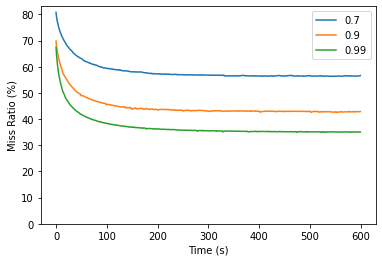

In [10]:
for z in z_list:
    plt.plot(np.arange(600), 100 * miss_ratio_dict[z], label=f"{z}")
plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Miss Ratio (%)")